In [1]:
import numpy as np
import matplotlib.pyplot as plt

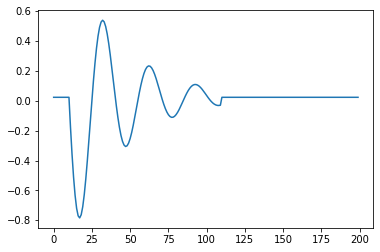

In [2]:
true_Z = {
    'Z': 0.95 + 0.2j,
    'Xi': 0+1j,
}
s = np.zeros(200, dtype=np.complex128)
s[10:110] += (true_Z['Z'] ** np.arange(100)) * true_Z['Xi']
s_centered = s.real
s_uncentered = s_centered - np.mean(s_centered)
plt.plot(s_uncentered)

In [3]:
from pydmd import ZDecomposition, HankelDMD, DMD
from pydmd.impulsedecomp import calculate_dynamics
import warnings

In [4]:
warnings.filterwarnings("ignore", category=UserWarning, module='pydmd', lineno=722)
warnings.filterwarnings("ignore", category=RuntimeWarning, module='pydmd', lineno=271)

99


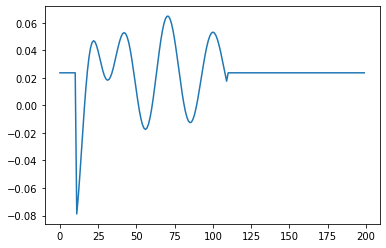

In [5]:
sub_dmd_args = {}
HDMD_kwargs = {
    'd': 9,
    'reconstruction_method': 'mean',
    'sub_dmd_class': DMD,
    'sub_class_args': sub_dmd_args
}

HDMD_obj = HankelDMD(**HDMD_kwargs)

z_dec = ZDecomposition(HDMD_obj=HDMD_obj)
Z, residual_signal = z_dec.sift(
    s_uncentered.copy(), 50, min_freq=0, max_freq=np.inf,
    perturbation_thresh=0.0001, corr_thresh=-0.0001, min_wavelength_match=0.5,
    wav_mag_thresh=0
)
print(Z['len'])
plt.plot(residual_signal)

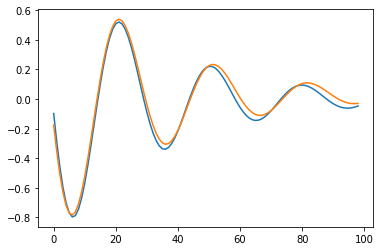

In [6]:
plt.plot(
    calculate_dynamics(
        Z['Z'],
        Z['Xi'],
        len(s),
        Z['t0']
    ).real[Z['start']:Z['end']]
)
plt.plot(s_uncentered[Z['start']:Z['end']])

In [7]:
print(true_Z)
print({'Z': Z['Z'], 'Xi': Z['Xi'] * (Z['Z'] ** -(Z['t0'] - 10))})

{'Z': (0.95+0.2j), 'Xi': 1j}
{'Z': (0.9494104768459577+0.20569164695031456j), 'Xi': (0.11109582295021958+0.9871059901003358j)}


99


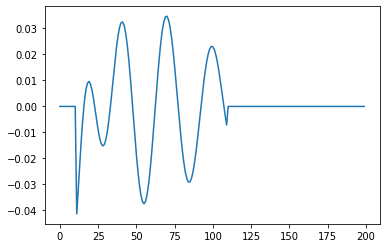

In [8]:
sub_dmd_args = {}
HDMD_kwargs = {
    'd': 9,
    'reconstruction_method': 'mean',
    'sub_dmd_class': DMD,
    'sub_class_args': sub_dmd_args
}

HDMD_obj = HankelDMD(**HDMD_kwargs)

z_dec = ZDecomposition(HDMD_obj=HDMD_obj)
Z, residual_signal = z_dec.sift(
    s_centered.copy(), 50, min_freq=0, max_freq=np.inf,
    perturbation_thresh=0.0001, corr_thresh=-0.0001, min_wavelength_match=0.5,
    wav_mag_thresh=0
)
print(Z['len'])
plt.plot(residual_signal)

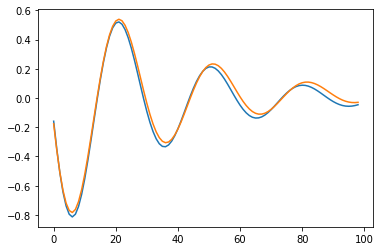

In [9]:
plt.plot(
    calculate_dynamics(
        Z['Z'],
        Z['Xi'],
        len(s),
        Z['t0']
    ).real[Z['start']:Z['end']]
)
plt.plot(s_uncentered[Z['start']:Z['end']])

In [10]:
print(true_Z)
print({'Z': Z['Z'], 'Xi': Z['Xi'] * (Z['Z'] ** -(Z['t0'] - 10))})

{'Z': (0.95+0.2j), 'Xi': 1j}
{'Z': (0.9487723219342161+0.20397178989278203j), 'Xi': (0.05032320008784941+1.0119634799941073j)}


In [11]:
Z

{'Z': (0.9487723219342161+0.20397178989278203j),
 'A': (-0.10384838007582724-0.2368095303413455j),
 'M': array([-0.26873803+0.25834042j, -0.30735987+0.19051673j,
        -0.33069816+0.11849594j, -0.33863983+0.04558027j,
        -0.33173265-0.02507992j, -0.30817053-0.09300327j,
        -0.27253357-0.15232971j, -0.22723087-0.20066061j,
        -0.17497808-0.23627807j]),
 'Xi': (0.16046161513373855+0.11016376764727846j),
 't0': 65,
 'start': 11,
 'end': 110,
 'len': 99,
 'sum_corr': 5.1323541034945555,
 'corr': array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -4.54146652e-03,
                    nan,             nan,  1.73250138e-02,  2.93502215e-02,
         3.97414278e-02,  4.66945212e-02,  4.91949920e-02,  4.70973718e-02,
         4.10510556e-02,  3.23021218e-02,  2.24180889e-02,  1.29901062e-02,
         5.36471075e-03,  4.464